<a href="https://colab.research.google.com/github/LatiefDataVisionary/customer-segmentation-strategy/blob/main/notebooks/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation Analysis Project**

**Project By:** Lathif Ramadhan

## **Dataset**

- **Name:** Customer Segmentation
- **Source:** Kaggle (vetrirah/customer)
- **Link:** https://www.kaggle.com/datasets/vetrirah/customer
- **Description:** This dataset contains information about customers, including demographics, lifestyle, and spending habits, aiming to identify distinct customer groups for targeted marketing strategies.

## **Project Overview**

This end-to-end data science project focuses on performing a comprehensive customer segmentation analysis using the provided dataset. The project aims to achieve two main goals:

1.  **Supervised Classification:** Build and evaluate classification models (SVC, Decision Tree, Naive Bayes) to predict the existing `Segmentation` labels in the dataset.
2.  **Unsupervised Clustering:** Apply clustering algorithms (K-Means, DBSCAN) to identify natural customer groups based on their attributes, without using the existing `Segmentation` labels.

The project will follow a structured approach, including:

*   **Data Loading and Initial Exploration (EDA):** Loading the data, understanding its structure, checking for missing values and duplicates, and performing initial visualizations.
*   **Data Preprocessing:** Handling missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.
*   **Supervised Modeling:** Training and evaluating classification models to predict the `Segmentation` column.
*   **Unsupervised Clustering:** Applying clustering techniques to discover underlying customer segments.
*   **Interpretation and Findings:** Analyzing and interpreting the results from both classification and clustering approaches.
*   **Conclusion and Recommendations:** Summarizing key findings and providing actionable business recommendations for marketing strategies.
*   **Code Refactoring and Documentation:** Ensuring the notebook is clean, well-commented, and structured for a professional portfolio.

This notebook serves as a step-by-step guide through the entire process, demonstrating best practices in data analysis and machine learning.

## **Phase 1: Setup and Initial Data Exploration**

**Objective:** Prepare the working environment, load the data, and perform initial checks to understand the data structure and quality.

### **Task 1.1 - Import Libraries**

First, we need to import all the necessary Python libraries that will be used throughout the project. We'll need `pandas` for data manipulation, `numpy` for numerical operations, `matplotlib.pyplot` and `seaborn` for visualization, and `train_test_split` from `sklearn.model_selection` for splitting data later.

In [63]:
# Task 1.1 - Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


### **Task 1.2 - Load Data**

Next, we will load the `Train.csv` dataset into a Pandas DataFrame named `df`. Based on the previous execution output, the file is located at `/root/.cache/kagglehub/datasets/vetrirah/customer/versions/1/Train.csv`. We will use this path to read the data.

In [41]:
# Task 1.2 - Load Data
# Using the path found from previous execution
path = "/root/.cache/kagglehub/datasets/vetrirah/customer/versions/1"
df = pd.read_csv(f"{path}/Train.csv")

### **Task 1.3 - Initial Inspection**

Once the data is loaded, it's crucial to perform an initial inspection to understand the data structure, data types of each column, presence of missing values, and a statistical summary. This will give us an overview of the data's "health" before proceeding with further preprocessing. We will use the `.head()`, `.info()`, `.describe()`, `.isnull().sum()`, and `.duplicated().sum()` methods for this.

In [42]:
# Task 1.3 - Initial Inspection

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Display summary info
print("\nSummary information of the dataset:")
df.info()

# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
display(df.describe(include='all'))

# Count and display missing values per column
print("\nNumber of missing values per column:")
display(df.isnull().sum())

# Check for duplicated rows
print("\nNumber of duplicated rows:")
display(df.duplicated().sum())

First 5 rows of the dataset:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A



Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB

Descriptive statistics of the dataset:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN



Number of missing values per column:


,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76



Number of duplicated rows:


np.int64(0)

## **Phase 2: Exploratory Data Analysis (EDA)**

**Objective:** Delve deeper into the data using visualizations to uncover patterns, relationships, and anomalies. For each plot, provide the code and a brief interpretation of what we observe.

### **Task 2.1 - Target Variable Analysis**

Let's start by analyzing the distribution of our target variable, `Segmentation`. By looking at the count of observations in each segment, we can understand if our dataset has a balanced or imbalanced class distribution. This is important to consider when building classification models later.

/tmp/ipython-input-904027992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Segmentation', palette='viridis')


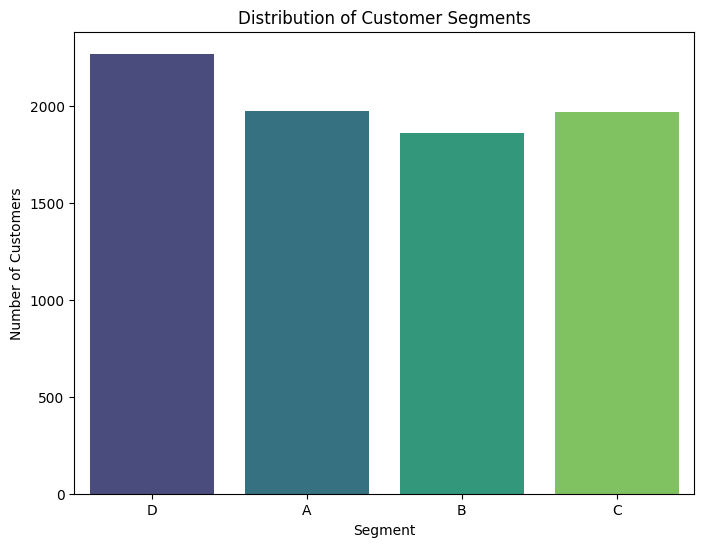

In [43]:
# Task 2.1 - Target Variable Analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Segmentation', palette='viridis')
plt.title('Distribution of Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

# Interpretation:
# From the plot above, we can see the distribution of customer counts in each segment (A, B, C, D).
# Observe if the number of customers in each segment is relatively similar (balanced) or if one or more segments dominate (imbalanced).

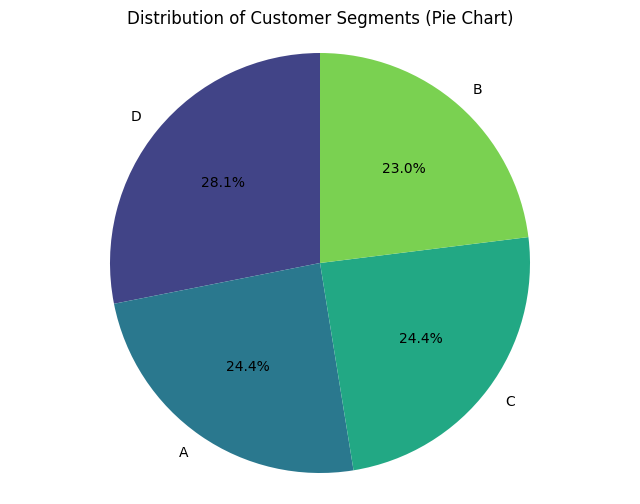

In [44]:
# Calculate the counts of each segment
segment_counts = df['Segmentation'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(x=segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(segment_counts)))
plt.title('Distribution of Customer Segments (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [45]:
# Calculate the percentage of each segment
segment_percentages = df['Segmentation'].value_counts(normalize=True) * 100

# Create a DataFrame to display the distribution
segment_distribution_table = pd.DataFrame({
    'Count': segment_counts,
    'Percentage (%)': segment_percentages
})

# Sort the table by count in descending order
segment_distribution_table = segment_distribution_table.sort_values(by='Count', ascending=False)

print("Distribution of Customer Segments:")
display(segment_distribution_table)

Distribution of Customer Segments:


,Count,Percentage (%)
Segmentation,,
D,2268,28.111056
A,1972,24.442241
C,1970,24.417452
B,1858,23.029251


### **Task 2.2 - Univariate Analysis**

Next, we will examine the distribution of each variable individually. For categorical variables, we will use countplots to see the frequency of each category. For numerical variables, we will use histograms to see the shape of their distribution (normal, skewed, etc.) and boxplots to identify potential outliers.

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


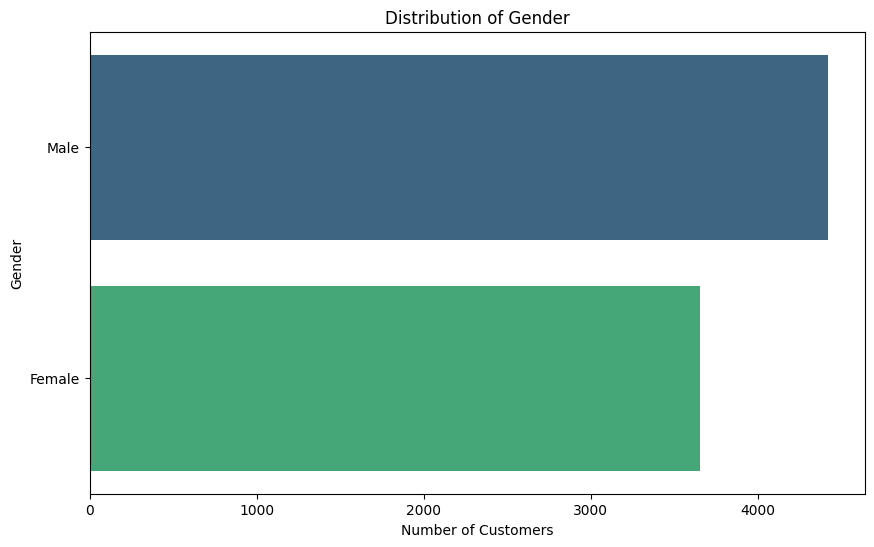

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


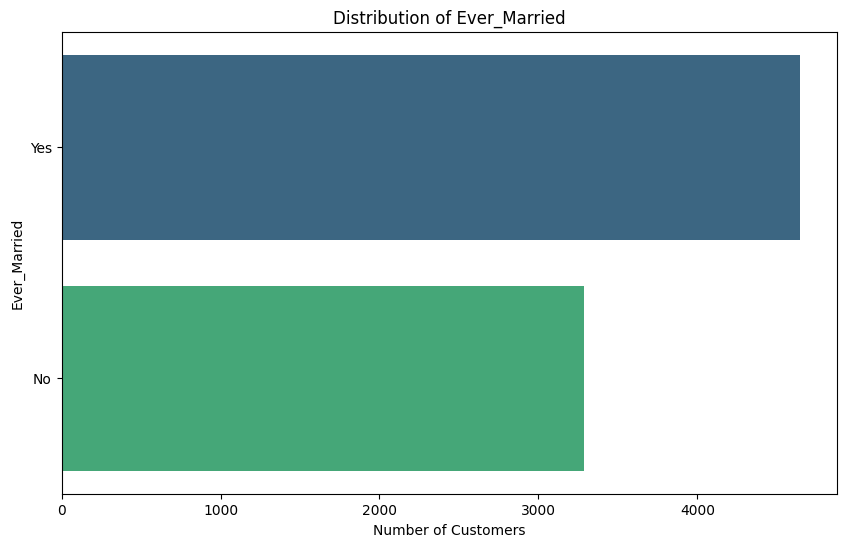

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


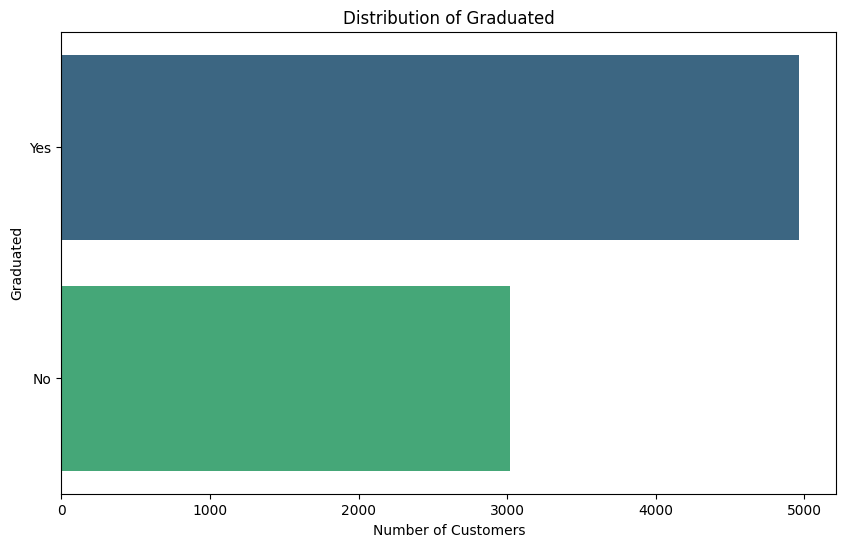

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


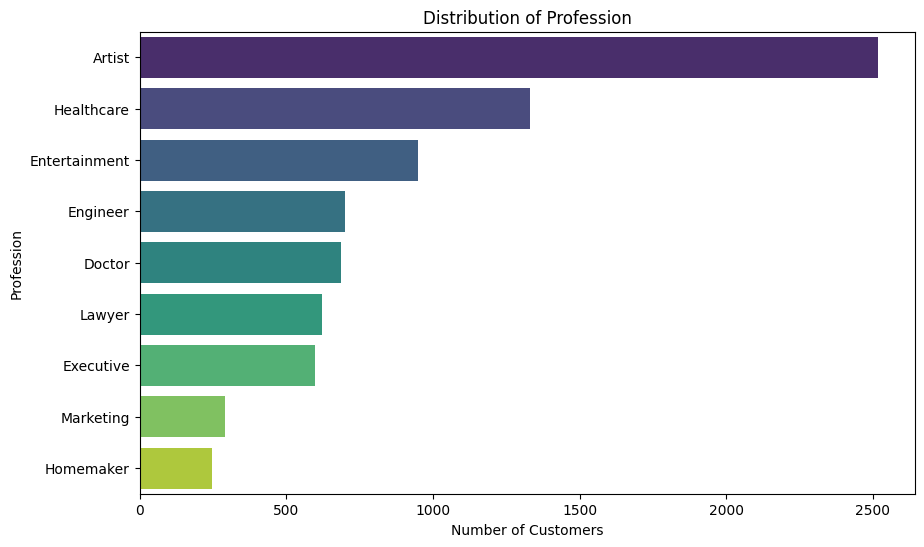

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


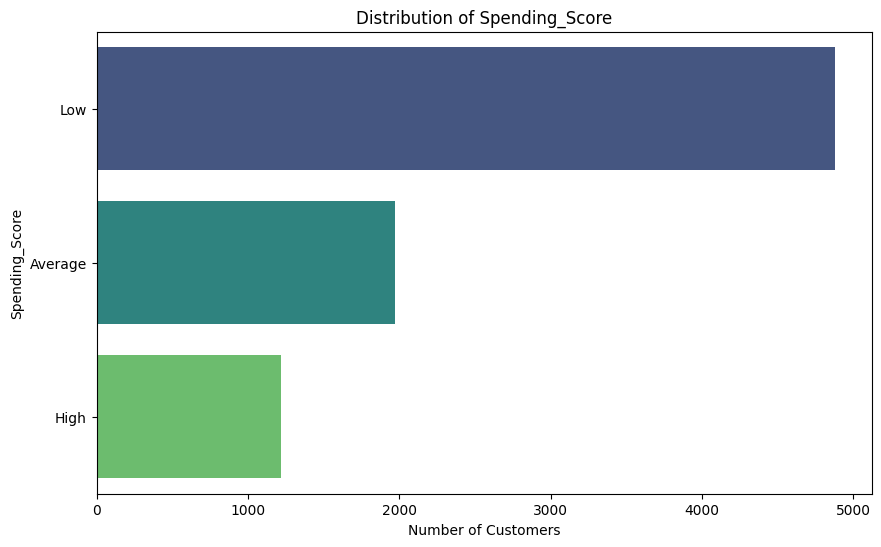

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


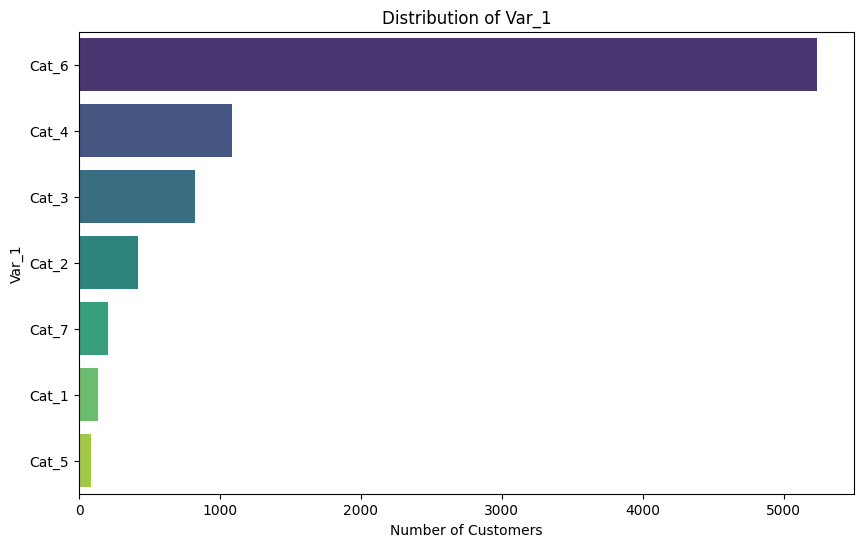

In [46]:
# Categorical Variables
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Number of Customers')
    plt.ylabel(col)
    plt.show()

/tmp/ipython-input-225638758.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


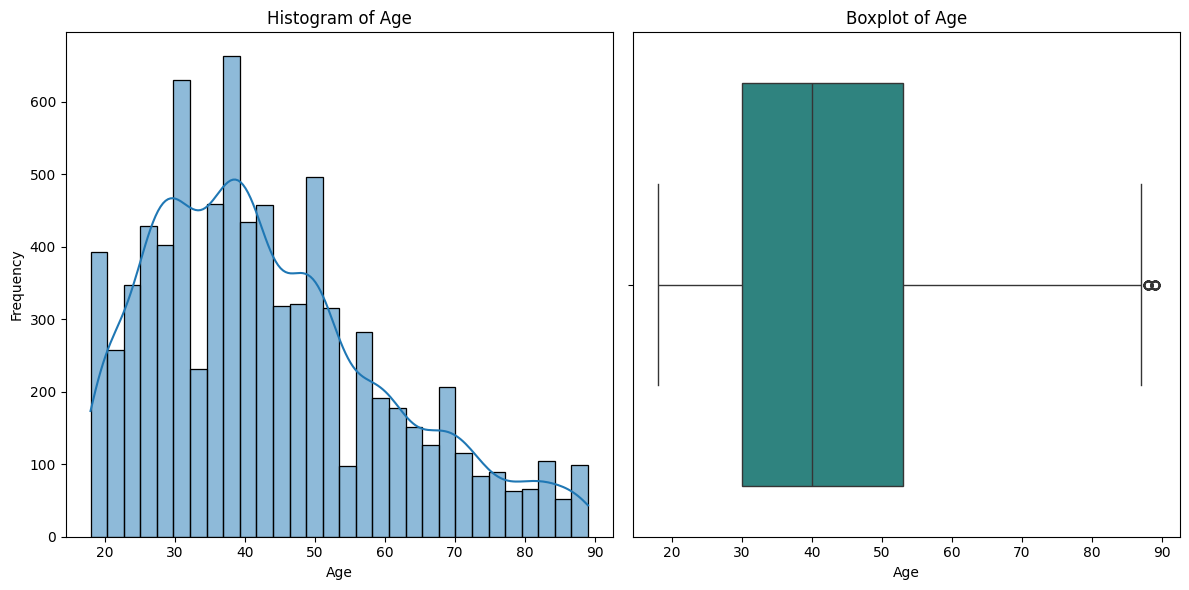

/tmp/ipython-input-225638758.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


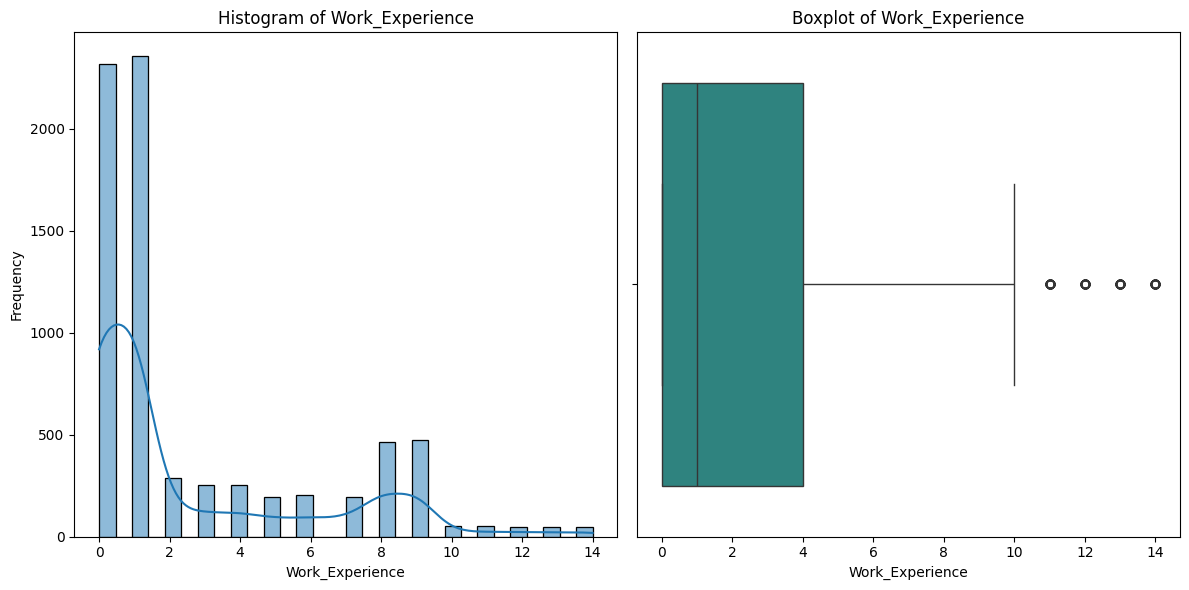

/tmp/ipython-input-225638758.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


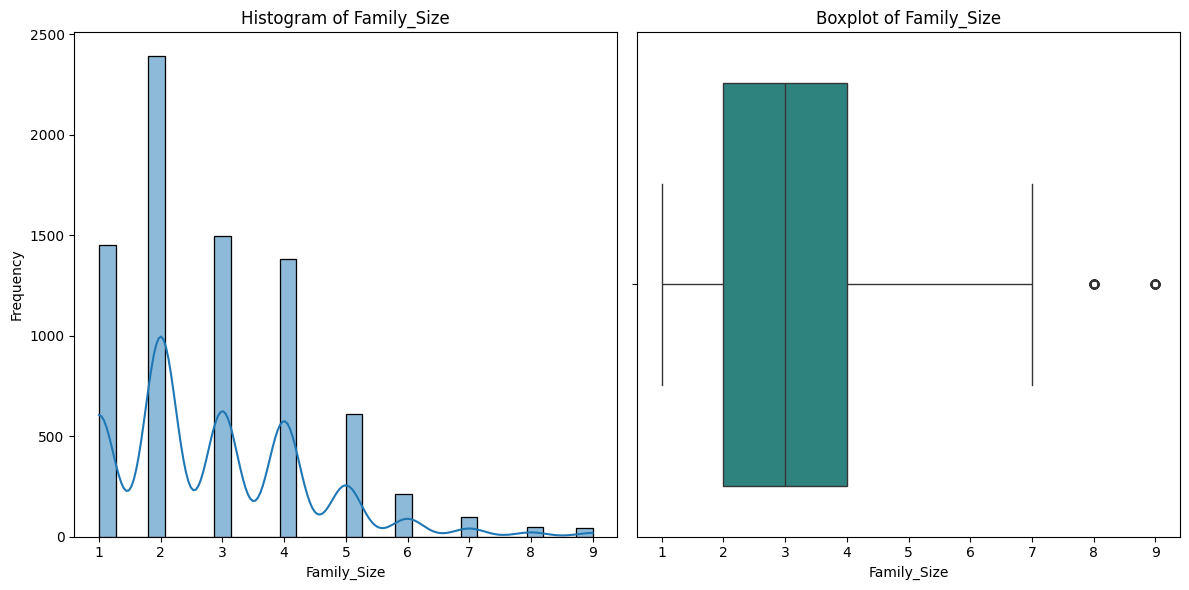

In [47]:
# Numerical Variables
numeric_cols = ['Age', 'Work_Experience', 'Family_Size']

for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, palette='viridis')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

# Interpretation:
# For categorical columns, note which categories appear most frequently.
# For numerical columns, look at the shape of the distribution (normal, skewed left/right). Boxplots help identify the presence of outliers.

### **Task 2.3 - Bivariate Analysis (Relationship with Target)**

After understanding the distribution of each variable, we will look at how these variables relate to our target variable `Segmentation`. This will help us identify features that might be most influential in predicting or grouping customers. We will use countplots with `hue` for categorical variables and boxplots/violinplots for numerical variables.

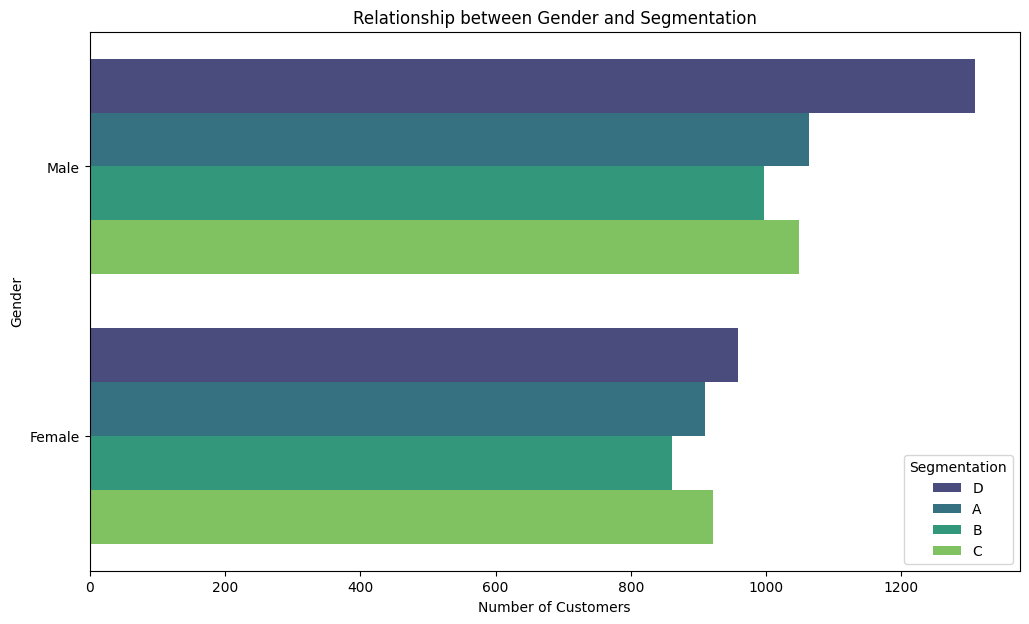

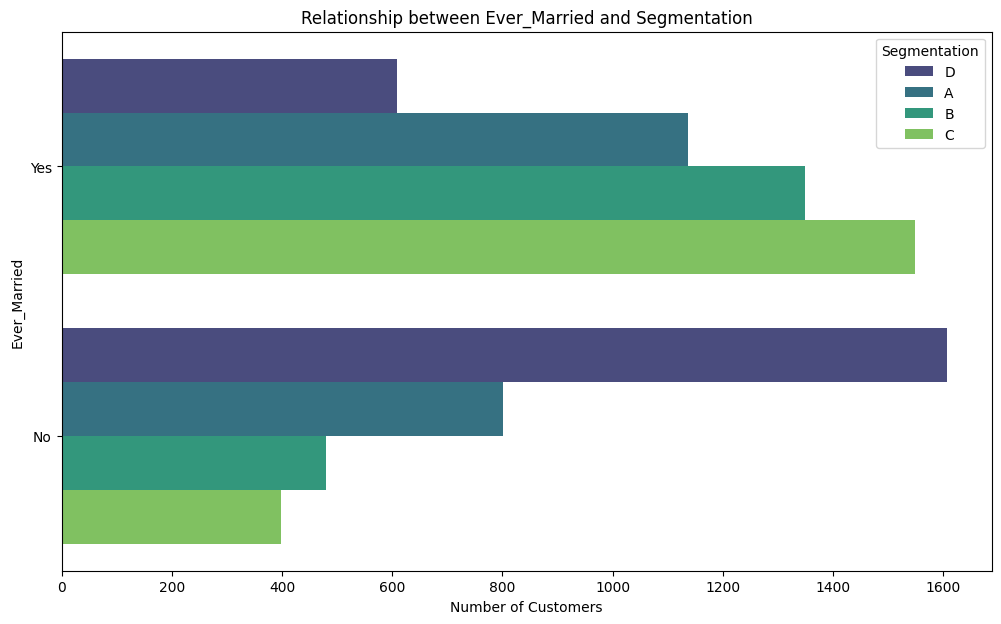

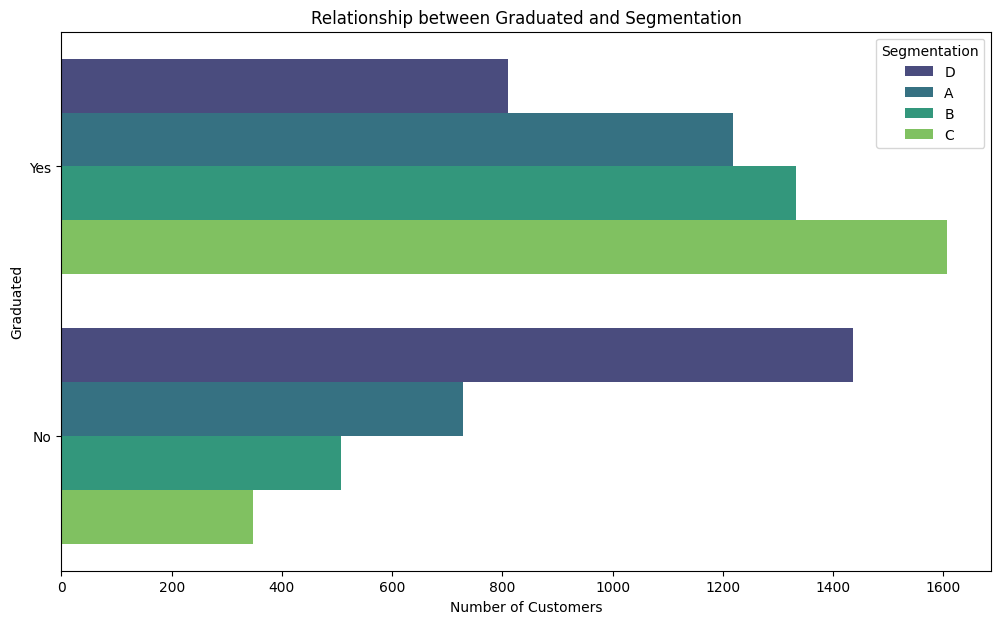

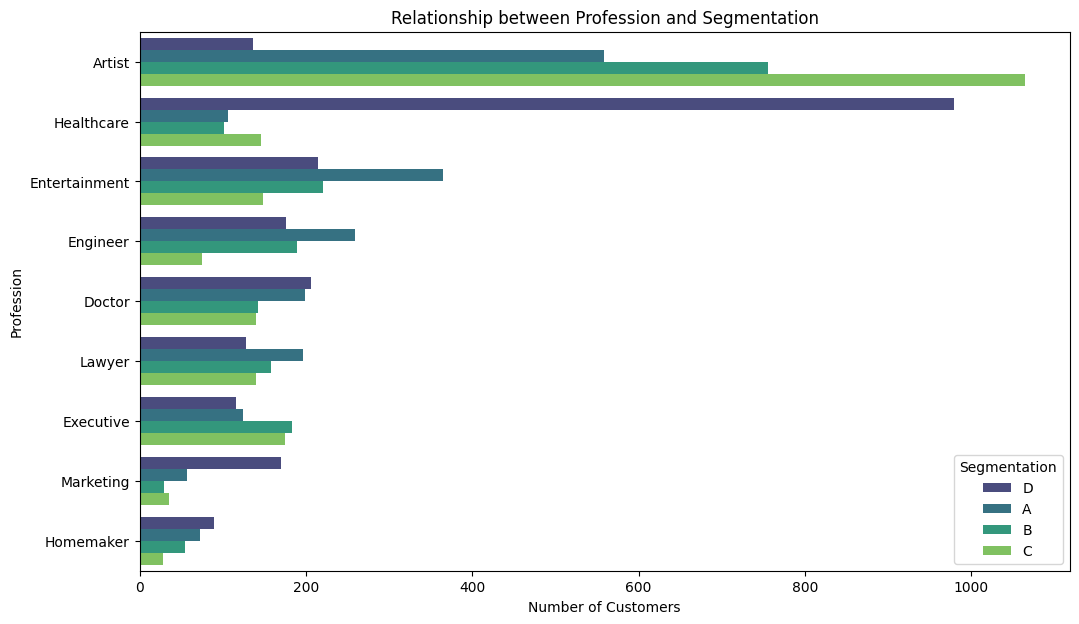

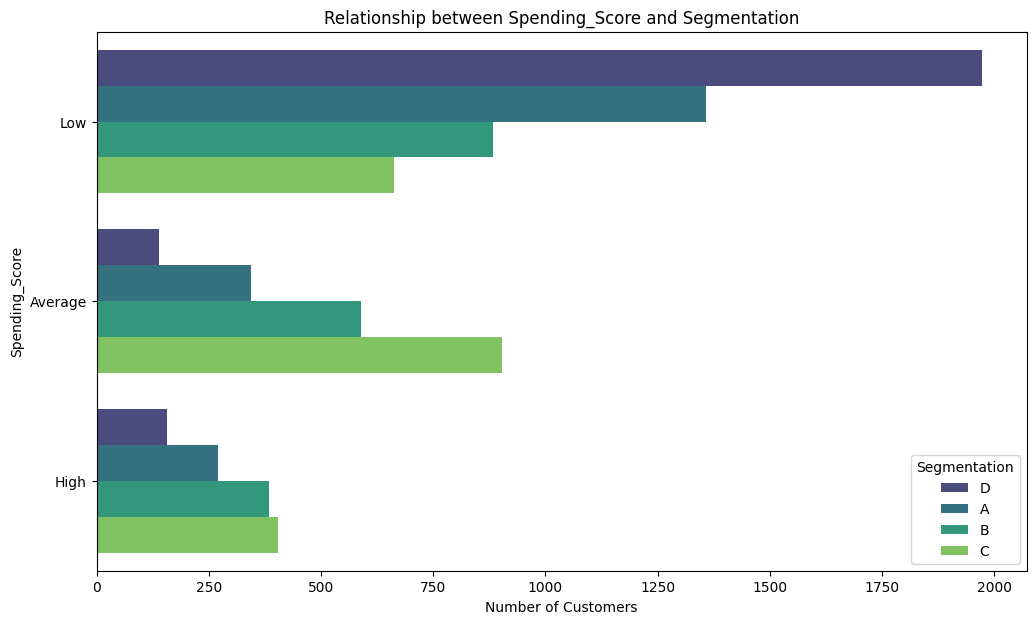

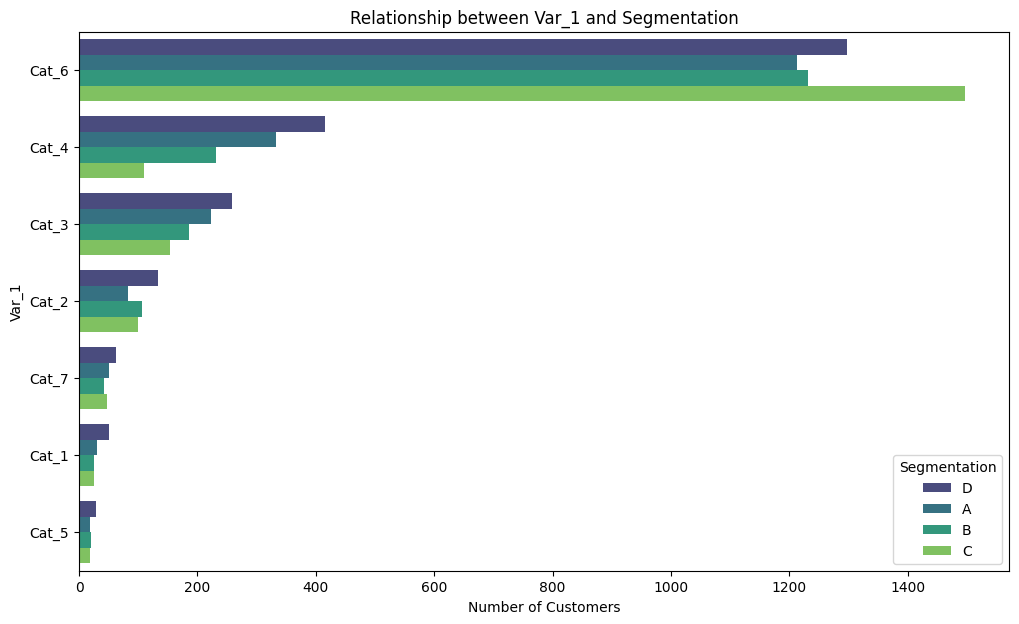

In [48]:
# Categorical vs Target
for col in categorical_cols:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, y=col, hue='Segmentation', palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Relationship between {col} and Segmentation')
    plt.xlabel('Number of Customers')
    plt.ylabel(col)
    plt.legend(title='Segmentation')
    plt.show()

/tmp/ipython-input-3186461051.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segmentation', y=col, palette='viridis')


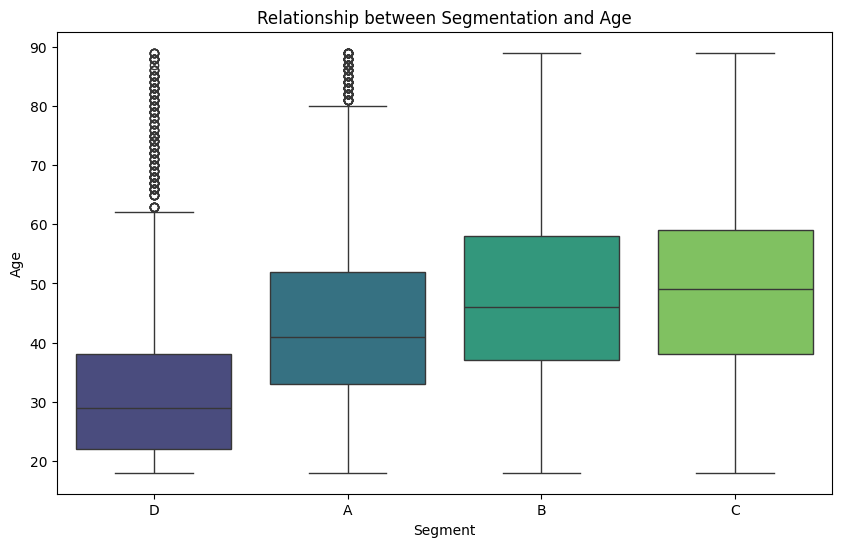

/tmp/ipython-input-3186461051.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segmentation', y=col, palette='viridis')


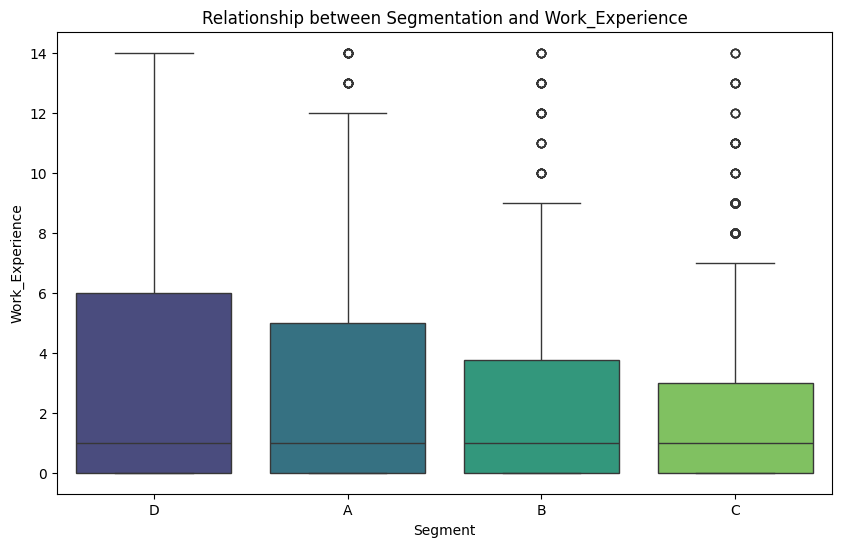

/tmp/ipython-input-3186461051.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segmentation', y=col, palette='viridis')


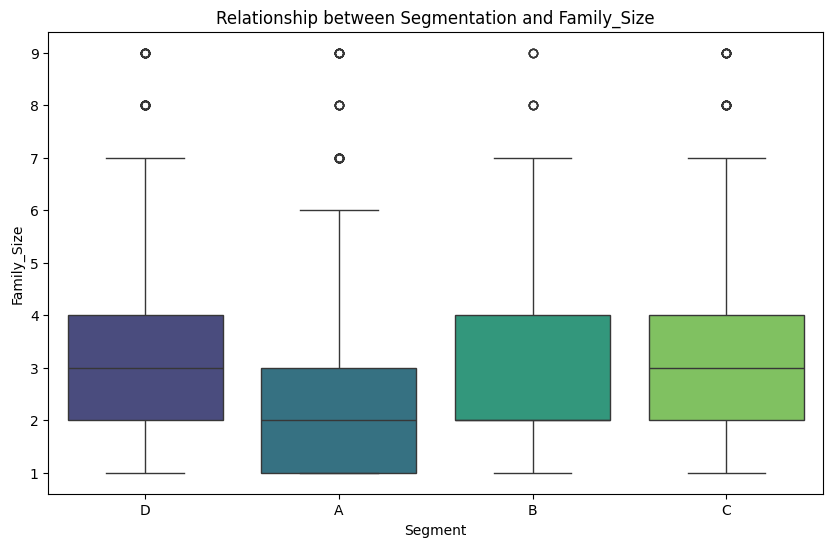

In [49]:
# Numerical vs Target
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Segmentation', y=col, palette='viridis')
    plt.title(f'Relationship between Segmentation and {col}')
    plt.xlabel('Segment')
    plt.ylabel(col)
    plt.show()

# Interpretation:
# Observe how the distribution of customer segments changes based on the categories or value ranges of other features.
# Are there specific categories or value ranges that tend to be associated with certain segments?

### **Task 2.4 - Multivariate Analysis**

Finally, we will look at the relationships between numerical variables using a heatmap of the correlation matrix. This helps us detect multicollinearity, which is when two or more numerical features are highly correlated. Multicollinearity can affect the performance of some machine learning models.

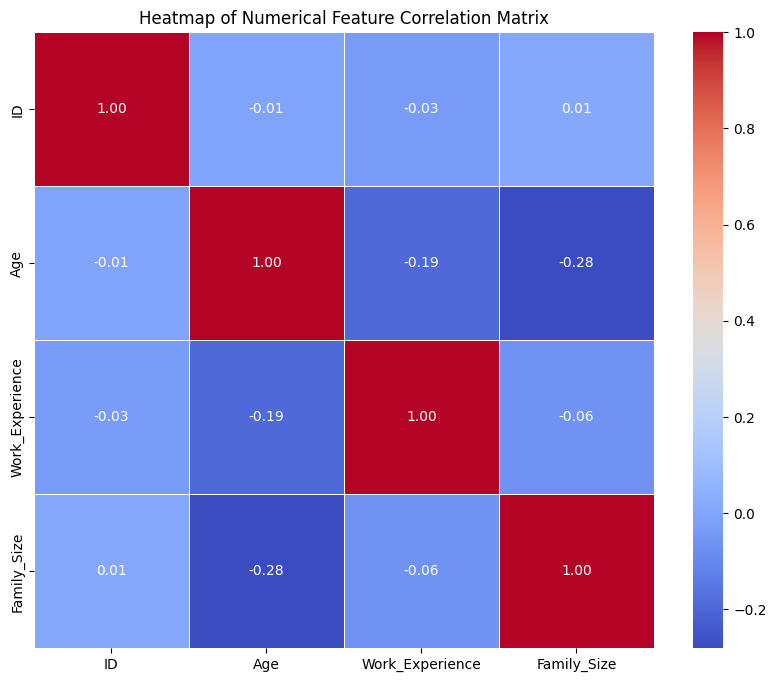

In [50]:
# Task 2.4 - Multivariate Analysis (Correlation between Numerical Features)

# Select only numerical columns
df_numeric = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Numerical Feature Correlation Matrix')
plt.show()

# Interpretation:
# The numbers on the heatmap show the correlation coefficient between pairs of features.
# Values close to 1 or -1 indicate a strong correlation (positive or negative).
# Values close to 0 indicate a weak correlation.
# Note if there are pairs of features with very high correlation (e.g., > 0.7 or < -0.7), as this might indicate multicollinearity.

## **Phase 3: Data Preprocessing**

**Objective:** Clean and transform the raw data into a format ready for machine learning models.

### **Task 3.1 - Outlier Handling**

Based on the boxplots from the EDA phase, some numerical features (`Age`, `Work_Experience`, `Family_Size`) show potential outliers. Outliers can significantly affect some machine learning algorithms. We will address these by applying a common technique like capping (limiting values to a certain range, e.g., based on IQR). We will focus on `Work_Experience` and `Family_Size` as `Age` outliers (older ages) might represent valid customer segments.

In [51]:
# Task 3.1 - Outlier Handling

# Identify numerical columns with potential outliers (based on EDA boxplots)
# We will handle outliers for Work_Experience and Family_Size
outlier_cols = ['Work_Experience', 'Family_Size', 'Age']

for col in outlier_cols:
    print(f"Handling outliers for column: {col}")
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at the bounds
    # Use .loc to avoid SettingWithCopyWarning
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound

    print(f"Outliers in {col} capped at lower bound ({lower_bound:.2f}) and upper bound ({upper_bound:.2f}).")

# Optional: Verify after capping (e.g., re-run boxplots or check min/max)
print("\nMin/Max values after outlier capping:")
display(df[outlier_cols].agg(['min', 'max']))

Handling outliers for column: Work_Experience
Outliers in Work_Experience capped at lower bound (-6.00) and upper bound (10.00).
Handling outliers for column: Family_Size
Outliers in Family_Size capped at lower bound (-1.00) and upper bound (7.00).
Handling outliers for column: Age
Outliers in Age capped at lower bound (-4.50) and upper bound (87.50).

Min/Max values after outlier capping:


/tmp/ipython-input-2329951684.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound


,Work_Experience,Family_Size,Age
min,0.0,1.0,18.0
max,10.0,7.0,87.5


/tmp/ipython-input-553182984.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


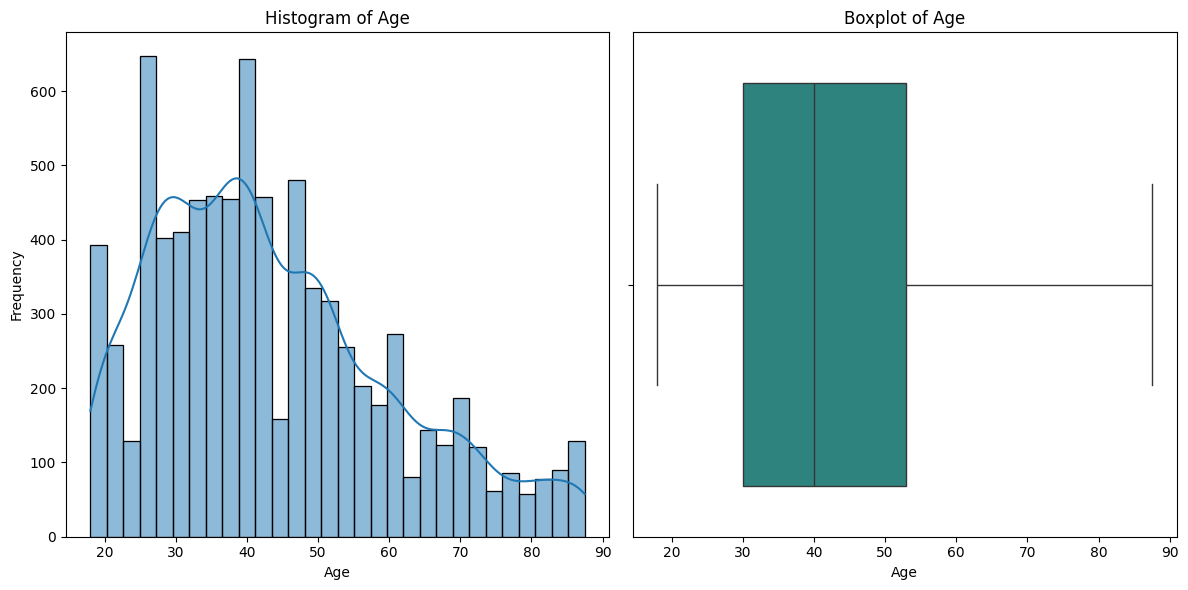

/tmp/ipython-input-553182984.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


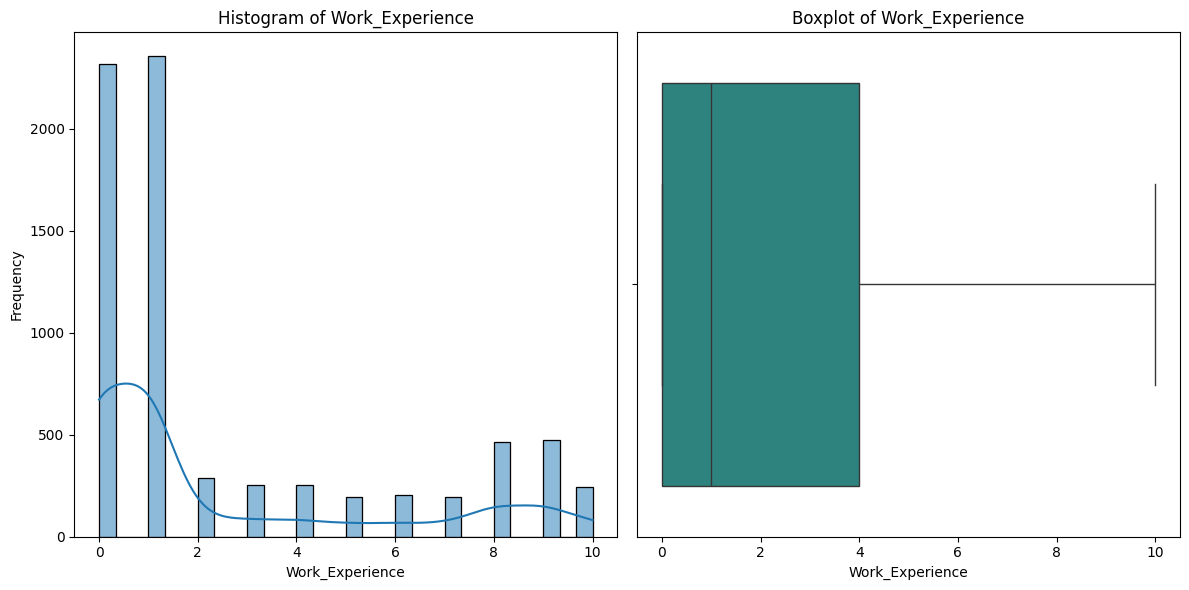

/tmp/ipython-input-553182984.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


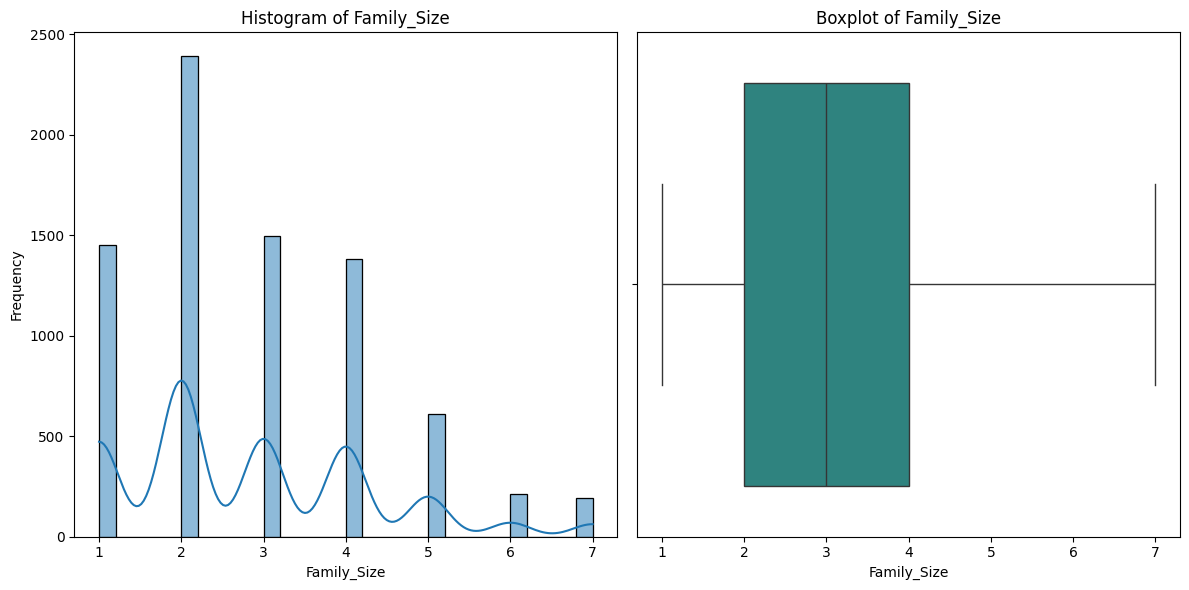

In [53]:
# Recheck the distribution of Numerical Variables
numeric_cols = ['Age', 'Work_Experience', 'Family_Size']

for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, palette='viridis')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

#### **Task 3.1.1 - Feature Engineering (Example)**

Let's add an example of feature engineering. We can create a new categorical feature based on `Age` and `Ever_Married` to group customers into age/marital status categories. This should be done after handling missing values but before encoding and scaling.

In [52]:
# Task 3.1.1 - Feature Engineering (Example)

# Create age categories
def age_category(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 50:
        return 'Middle-aged'
    else:
        return 'Senior'

df['Age_Category'] = df['Age'].apply(age_category)

# Combine Age_Category and Ever_Married (handle potential NaN in Ever_Married if not filled yet)
# Ensure missing values in Ever_Married are filled before this step
df['Age_Married_Category'] = df['Age_Category'] + '_' + df['Ever_Married'].fillna('Unknown') # Fill NaN in Ever_Married for combination

print("New features 'Age_Category' and 'Age_Married_Category' created.")
display(df[['Age', 'Ever_Married', 'Age_Category', 'Age_Married_Category']].head())

# Note: If Ever_Married missing values were handled in Task 3.2, the .fillna('Unknown') here is redundant but safe.

# --- Placement in Notebook ---
# This code cell should be placed within Phase 3 (Data Preprocessing),
# ideally after Task 3.2 (Handling Missing Values) and before Task 3.3 (Encoding Categorical Variables),
# as the new categorical features ('Age_Category', 'Age_Married_Category') will also need to be encoded.

New features 'Age_Category' and 'Age_Married_Category' created.


,Age,Ever_Married,Age_Category,Age_Married_Category
0,22.0,No,Young,Young_No
1,38.0,Yes,Middle-aged,Middle-aged_Yes
2,67.0,Yes,Senior,Senior_Yes
3,67.0,Yes,Senior,Senior_Yes
4,40.0,Yes,Middle-aged,Middle-aged_Yes


### **Task 3.2 - Handling Missing Values**

Now, we will address the missing values identified during the initial inspection. We will use imputation strategies appropriate for each column's data type: mode for categorical variables and median for numerical variables (especially if they were skewed).

In [54]:
# Task 3.2 - Handling Missing Values

# Strategy: Mode for categorical, Median for numerical

# Categorical columns with missing values: Ever_Married, Graduated, Profession, Var_1
categorical_cols_with_missing = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
for col in categorical_cols_with_missing:
    # Calculate mode only from non-missing values
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Numerical columns with missing values: Work_Experience, Family_Size
# Use median, especially after outlier capping as median is robust
numeric_cols_with_missing = ['Work_Experience', 'Family_Size']
for col in numeric_cols_with_missing:
    # Calculate median only from non-missing values
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

print("Number of missing values after handling:")
display(df.isnull().sum())

Number of missing values after handling:


/tmp/ipython-input-994623395.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-994623395.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


### **Task 3.3 - Encoding Categorical Variables**

Machine learning models require numerical input. We will convert categorical variables into numerical representations. `Spending_Score` will be ordinally encoded due to its inherent order, while other nominal categorical variables will be one-hot encoded. One-hot encoding is preferred for nominal features as it prevents the model from assuming a false sense of order between categories.

In [55]:
# Task 3.3 - Encoding Categorical Variables
# Ordinal Encoding for Spending_Score
# Ensure the order is correct
spending_score_order = ['Low', 'Average', 'High']
ordinal_encoder = OrdinalEncoder(categories=[spending_score_order])

# One-Hot Encoding for nominal variables
nominal_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']
# handle_unknown='ignore' is useful if test set has categories not seen in training set
# sparse_output=False ensures dense numpy array output
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# We will apply encoding after splitting the data to prevent data leakage.
# The ColumnTransformer setup is shown here, but applied later in a pipeline or separately.

# Create a preprocessor object (will be used in a pipeline after splitting)
# This preprocessor will handle both ordinal and one-hot encoding
preprocessor_encoding = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder, ['Spending_Score']),
        ('onehot', onehot_encoder, nominal_cols)
    ],
    remainder='passthrough' # Keep other columns (like numerical) for now
)

print("Categorical encoders set up.")

Categorical encoders set up.


### **Task 3.4 - Feature Selection & Splitting**

We will remove the 'ID' column as it's not a predictive feature. Then, we'll separate the dataset into features (X) and the target variable (y), which is 'Segmentation'.

In [56]:
# Task 3.4 - Feature Selection & Splitting

# Drop the 'ID' column
df_processed = df.drop('ID', axis=1)

# Separate features (X) and target (y)
X = df_processed.drop('Segmentation', axis=1)
y = df_processed['Segmentation']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (8068, 11)
Shape of y: (8068,)


### **Task 3.5 - Data Splitting**

Now, we split the data into training and testing sets (X_train, X_test, y_train, y_test). The training set is used to train the models, and the testing set is used to evaluate their performance on unseen data. Using `stratify=y` is crucial for classification tasks, especially with imbalanced classes, as it ensures that the proportion of each target class is the same in both the training and testing sets.

In [57]:
# Task 3.5 - Data Splitting

# Split data into training and testing sets (e.g., 80% train, 20% test)
# Use stratify=y to maintain the proportion of target classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Explanation of why stratify is important:
# Stratification ensures that the distribution of the target classes (Segmentation) in both the training
# and testing sets mirrors the distribution in the original dataset. This is particularly important
# for datasets with imbalanced classes, as it prevents one class from being overrepresented or
# underrepresented in either set, which could lead to biased or inaccurate model performance.

Shape of X_train: (6454, 11)
Shape of X_test: (1614, 11)
Shape of y_train: (6454,)
Shape of y_test: (1614,)


### **Task 3.6 - Feature Scaling**

Feature scaling standardizes the range of feature values. This is important for algorithms that are sensitive to the magnitude of features (like SVM and K-Means). We will use `StandardScaler`, which standardizes features by removing the mean and scaling to unit variance. To prevent data leakage, we will `fit_transform` the scaler only on the training data (`X_train`) and then only `transform` the test data (`X_test`) using the parameters learned from the training data. We will incorporate the encoding and scaling steps into a pipeline or apply them sequentially after the data split.

In [60]:
# Task 3.6 - Feature Scaling and Combining with Encoding

# Identify numerical columns that need scaling after encoding
# These are the original numerical columns
numerical_cols_for_scaling = ['Age', 'Work_Experience', 'Family_Size']

# Identify *all* categorical columns that need encoding
# Include the new engineered features if you want to use them in the models
categorical_cols_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1', 'Age_Category', 'Age_Married_Category']
# Separate ordinal from nominal
ordinal_col = ['Spending_Score']
nominal_cols = [col for col in categorical_cols_to_encode if col not in ordinal_col]


# Create a ColumnTransformer that applies:
# 1. Ordinal encoding to 'Spending_Score'
# 2. One-hot encoding to nominal_cols
# 3. Standard scaling to the numerical columns ('Age', 'Work_Experience', 'Family_Size')
# Use remainder='drop' to drop any columns not explicitly listed in transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[spending_score_order]), ordinal_col), # Use the order defined in Task 3.3
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols),
        ('scaler', StandardScaler(), numerical_cols_for_scaling)
    ],
    remainder='drop' # Drop any columns not transformed (like 'ID' which was already dropped, but good practice)
)

# Create a pipeline (optional for just preprocessing, but good practice)
# For now, we just use the preprocessor to transform the data

print("Applying preprocessing (encoding and scaling) to training data...")
# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
print("Preprocessing applied to training data.")


print("Applying preprocessing (encoding and scaling) to test data...")
# Transform the test data (using parameters learned from training data)
X_test_processed = preprocessor.transform(X_test)
print("Preprocessing applied to test data.")


print("\nShape of X_train_processed after encoding and scaling:", X_train_processed.shape)
print("Shape of X_test_processed after encoding and scaling:", X_test_processed.shape)

# Explanation of fit_transform on train and transform on test:
# The `fit()` method calculates the parameters needed for the transformation (e.g., the mean and standard deviation for StandardScaler,
# or the categories for the encoders). The `transform()` method applies these learned parameters to the data.
# By calling `fit_transform()` on `X_train`, we learn the transformation parameters *only* from the training data
# and apply them to `X_train`.
# By calling only `transform()` on `X_test`, we apply the *same* transformation parameters learned from `X_train`
# to the test data.
# This prevents "data leakage" from the test set into the preprocessing step. If we were to fit the scaler
# or encoders on the entire dataset before splitting, or fit them on the test set, information about the
# test data's distribution would influence the preprocessing, leading to an unrealistically optimistic
# evaluation of the model's performance on new, unseen data.

Applying preprocessing (encoding and scaling) to training data...
Preprocessing applied to training data.
Applying preprocessing (encoding and scaling) to test data...
Preprocessing applied to test data.

Shape of X_train_processed after encoding and scaling: (6454, 38)
Shape of X_test_processed after encoding and scaling: (1614, 38)


## **Phase 4: Supervised Modeling - Classification**

**Objective:** Build, train, and evaluate the requested classification models.

### **Task 4.1 - Model Training**

We will train three different classification models on the training data: Support Vector Classifier (SVC), Decision Tree Classifier, and Gaussian Naive Bayes. Each of these models works differently in separating classes, making it interesting to see which one is most suitable for our dataset. We will train these models using the training set (`X_train_processed`, `y_train`).

In [61]:
# Task 4.1 - Model Training

# Initialize Models
model_svc = SVC(random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
model_gnb = GaussianNB()

# Train Models
print("Training SVC model...")
model_svc.fit(X_train_processed, y_train)
print("SVC training complete.")

print("\nTraining Decision Tree model...")
model_dt.fit(X_train_processed, y_train)
print("Decision Tree training complete.")

print("\nTraining Gaussian Naive Bayes model...")
model_gnb.fit(X_train_processed, y_train)
print("Gaussian Naive Bayes training complete.")

Training SVC model...
SVC training complete.

Training Decision Tree model...
Decision Tree training complete.

Training Gaussian Naive Bayes model...
Gaussian Naive Bayes training complete.


##### **Task 4.1.1 - Model Training with Cross-Validation**

Instead of simple train-test split evaluation, we can use cross-validation during training to get a more reliable estimate of model performance and reduce the risk of overfitting. We can integrate this into the model training loop in Task 4.1 or use it within hyperparameter tuning.

In [65]:
# Task 4.1.1 - Model Training with Cross-Validation (Example with SVC)

# Using the preprocessed training data X_train_processed and y_train
model_svc_cv = SVC(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_svc_cv, X_train_processed, y_train, cv=5, scoring='accuracy')

print(f"\nCross-validation Accuracy Scores for SVC: {cv_scores}")
print(f"Mean Cross-validation Accuracy for SVC: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy for SVC: {cv_scores.std():.4f}")

# --- Placement in Notebook ---
# This code cell can be placed within Phase 4 (Supervised Modeling - Classification),
# either as an alternative to the initial simple training in Task 4.1 or as an additional evaluation step.
# It demonstrates how to get a more robust performance estimate.


Cross-validation Accuracy Scores for SVC: [0.50348567 0.53679318 0.50503486 0.51355538 0.54573643]
Mean Cross-validation Accuracy for SVC: 0.5209
Standard Deviation of Cross-validation Accuracy for SVC: 0.0172


#### **Task 4.1.2 - Hyperparameter Tuning with Cross-Validation**

To find the best hyperparameters for a model, we can use techniques like GridSearchCV or RandomizedSearchCV, which combine hyperparameter search with cross-validation. This will replace the simple model initialization and training in Task 4.1 for the models we want to tune.

In [70]:
# Task 4.1.2 - Hyperparameter Tuning with Cross-Validation (Example with SVC using GridSearchCV)

# Import SVC again if needed, but it's already imported in Task 4.1

# Define the parameter grid to search
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
# scoring='accuracy' is the metric to optimize
# n_jobs=-1 uses all available CPU cores
grid_search_svc = GridSearchCV(estimator=SVC(random_state=42),
                               param_grid=param_grid_svc,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=1) # verbose to see progress

print("\nStarting GridSearchCV for SVC...")
# Fit GridSearchCV on the preprocessed training data
grid_search_svc.fit(X_train_processed, y_train)
print("GridSearchCV for SVC complete.")

# Get the best parameters and best score
print("\nBest parameters found for SVC:")
print(grid_search_svc.best_params_)
print("\nBest cross-validation accuracy score for SVC:")
print(f"{grid_search_svc.best_score_:.4f}") # Corrected f-string syntax

# The best model is available as grid_search_svc.best_estimator_
best_svc_model = grid_search_svc.best_estimator_

# Now you can evaluate this best model on the test set in Task 4.2
# y_pred_tuned_svc = best_svc_model.predict(X_test_processed)
# accuracy_tuned_svc = accuracy_score(y_test, y_pred_tuned_svc)
# print(f"\nAccuracy of tuned SVC model on test set: {accuracy_tuned_svc:.4f}")


# --- Placement in Notebook ---
# This code cell should be placed within Phase 4 (Supervised Modeling - Classification),
# as an alternative or addition to the initial model training in Task 4.1.
# You would typically do this for each model you want to tune.
# The best estimator (e.g., grid_search_svc.best_estimator_) would then be used for evaluation in Task 4.2.


Starting GridSearchCV for SVC...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
GridSearchCV for SVC complete.

Best parameters found for SVC:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Best cross-validation accuracy score for SVC:
0.5209


### **Task 4.2 - Model Evaluation**

After the models are trained, we need to evaluate how well they perform on unseen data, which is the testing set (`X_test_processed`, `y_test`). We will use several standard evaluation metrics:

*   **Accuracy Score**: The proportion of correct predictions out of the total predictions.
*   **Classification Report**: Provides metrics such as Precision, Recall, F1-score, and Support for each class.
*   **Confusion Matrix**: A table that shows the counts of True Positives, True Negatives, False Positives, and False Negatives. Visualizing it as a heatmap will make it easier to interpret.


--- Evaluating Model: SVC ---
Accuracy: 0.5322
Classification Report:
              precision    recall  f1-score   support

           A       0.44      0.48      0.46       394
           B       0.45      0.31      0.37       372
           C       0.56      0.55      0.56       394
           D       0.63      0.74      0.68       454

    accuracy                           0.53      1614
   macro avg       0.52      0.52      0.52      1614
weighted avg       0.52      0.53      0.52      1614




KeyboardInterrupt



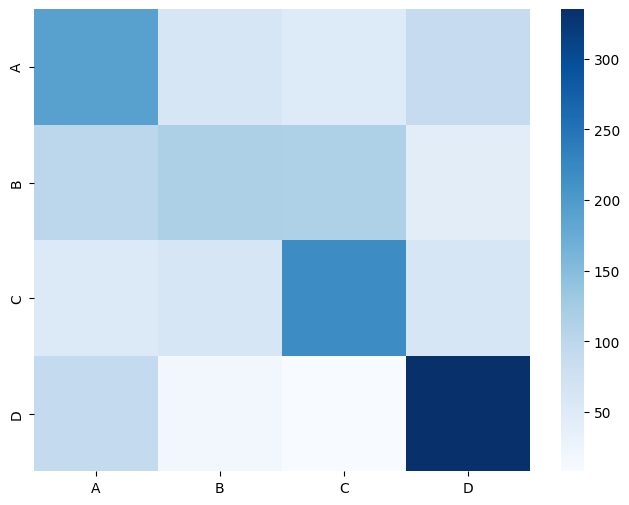

In [67]:
# Task 4.2 - Model Evaluation

models = {
    'SVC': model_svc,
    'Decision Tree': model_dt,
    'Gaussian Naive Bayes': model_gnb
}

evaluation_results = {}

for name, model in models.items():
    print(f"\n--- Evaluating Model: {name} ---")

    # Predict on X_test
    y_pred = model.predict(X_test_processed)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Store metrics for comparison
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision (Macro Avg)': report_dict['macro avg']['precision'],
        'Recall (Macro Avg)': report_dict['macro avg']['recall'],
        'F1-Score (Macro Avg)': report_dict['macro avg']['f1-score']
    }

### **Task 4.3 - Model Comparison & Conclusion**

After evaluating each model individually, we will compare the key performance metrics of all three models. This will help us determine which model performs best for this customer segmentation classification task. We can use a DataFrame or a simple bar plot for this comparison.

In [ ]:
# Task 4.3 - Model Comparison & Conclusion

# Create a DataFrame from evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T # Transpose to make models as index

print("\n--- Classification Model Performance Comparison ---")
display(evaluation_df)

# Optional: Visualize Comparison (displaying the DataFrame is also sufficient)
evaluation_df[['Accuracy', 'F1-Score (Macro Avg)']].plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Classification Model Accuracy and F1-Score (Macro Avg)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

# Conclusion:
# Based on the performance metrics (especially Accuracy and F1-Score Macro Avg) from the DataFrame above,
# the [Best Model Name] model shows the best performance in predicting customer segments.
# Also examine the classification report to see performance per class.